# Pandas Reference Guide

Pandas is a Python library that contains structures and functions useful for data exploration and analysis. The purpose of this document is to function as a quick reference guide for many of the common use cases used within the Pandas library.

Table of Contents:

1. [Creating Pandas Data Structures](#Creating_Pandas_Data_Structures)
2. [Accessing Data Within Pandas DataFrames](#Accessing_Data_Within_Pandas_DataFrames)
3. [Common DataFrame Functions](#Common_DataFrame_Functions)
4. [Cleaning Data Within Pandas DataFrames](#Cleaning_Data_Within_Pandas_DataFrames)
5. [Manipulating Data Within Pandas DataFrames](#Manipulating_Data_Within_Pandas_DataFrames)
6. [Common FinTech Use Cases With Pandas DataFrames](#Common_FinTech_Use_Cases_With_Pandas_DataFrames)

Check out [this link](https://pandas.pydata.org/pandas-docs/stable/) for more info.

---

## <a id='Creating_Pandas_Data_Structures'>Creating Pandas Data Structures</a>

The two main data structures Pandas utilizes are **Series** and **DataFrames**.

Section Breakdown:

1. [Pandas Series](#Pandas_Series)
2. [Pandas DataFrames](#Pandas_DataFrames)

### <a id='Pandas_Series'>Pandas Series</a>

- 1-D data structure (similar to Python lists, or an Excel column)
- Can contain multiple data types, but usually should contain data of one type
- Create a Pandas Series by passing in a **list** to **pd.Series()**
- By default, a Pandas Series will have an index that starts at 0; can access specific values using this index
- Learn more: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.html

In [1]:
# Import Pandas and NumPy libraries
import pandas as pd
import numpy as np

In [2]:
# Creating a Pandas Series
my_list = [100, 200, 400, 600, 900]
my_series = pd.Series(my_list)
my_series

0    100
1    200
2    400
3    600
4    900
dtype: int64

In [3]:
# Accessing specific values within Series
print(my_series[1]) # will print 200
print(my_series[3]) # will print 600

200
600


### <a id='Pandas_DataFrames'>Pandas DataFrames</a>

* 2-D data structure with labeled rows and columns (similar to tables in Excel)
  * For example: if we were looking at traffic violations data for New York City, each row could represent a violation instance and each column could represent a specific attribution of a violation (date, amount of fine, location, etc.)
* Create a Pandas Dataframe by using **pd.DataFrame()**, and passing in either a **list of dictionaries**, or a **dictionary with lists**
* A lot of data in the real world will be provided in tabular format which can be easily translated into DataFrames
* Learn more: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html

In [4]:
# Creating a Pandas DataFrame by passing in a LIST OF DICTIONARIES
# Each value in the list is a dictionary
# Imagine that each dictionary represents a row of data in our eventual DataFrame
# Each dictionary should have the same keys, since these keys dictate the column headers of our DataFrame
my_list = [
    {"id": 1, "name": "Bob", "account_balance": 500.14},
    {"id": 2, "name": "Amanda", "account_balance": 300.42},
    {"id": 3, "name": "Jill", "account_balance": 943.54},
    {"id": 4, "name": "Dylan", "account_balance": 112.53},
    {"id": 5, "name": "Alex", "account_balance": 895.51},
]

my_df_1 = pd.DataFrame(my_list)
my_df_1

,id,name,account_balance
0,1,Bob,500.14
1,2,Amanda,300.42
2,3,Jill,943.54
3,4,Dylan,112.53
4,5,Alex,895.51


In [5]:
# Re-create the previous Pandas DataFrame, passing in a DICTIONARY WITH LISTS
# The keys of the dictionary represent the column headers of our eventual DataFrame
# The lists contain the data for each column
my_dict = {
    "id": [1, 2, 3, 4, 5],
    "name": ["Bob", "Amanda", "Jill", "Dylan", "Alex"],
    "account_balance": [500.14, 300.42, 943.54, 112.53, 895.51],
}

my_df_2 = pd.DataFrame(my_dict)
my_df_2

,id,name,account_balance
0,1,Bob,500.14
1,2,Amanda,300.42
2,3,Jill,943.54
3,4,Dylan,112.53
4,5,Alex,895.51


In [6]:
# Select a single column from a DataFrame by passing in the column's name into square brackets
my_df_2["account_balance"]

0    500.14
1    300.42
2    943.54
3    112.53
4    895.51
Name: account_balance, dtype: float64

In [7]:
# You can also select a single column and assign it to another variable
names_col = my_df_2["name"]
names_col

0       Bob
1    Amanda
2      Jill
3     Dylan
4      Alex
Name: name, dtype: object

In [8]:
# Now names_col contains only the "names" column
print(names_col[1])

Amanda


In [9]:
# Select multiple columns from a DataFrame by passing in a list of the names of the columns
my_df_2[["name", "account_balance"]]

,name,account_balance
0,Bob,500.14
1,Amanda,300.42
2,Jill,943.54
3,Dylan,112.53
4,Alex,895.51


---

## <a id='Accessing_Data_Within_Pandas_DataFrames'>Accessing Data Within Pandas DataFrames</a>

Two functions exist to make life easier when trying to slice and dice DataFrames: **.iloc[ ]** and **.loc[ ]**

Section Breakdown:

1. [iloc](#iloc)
2. [loc](#loc)

### <a id='iloc'>.iloc[*rows*, *columns*]</a>

* Uses the *numeric* indexes of a dataframe's rows and columns to return specific values
* Uses single values to just get one row/column
* Uses a colon (:) to get all rows/columns
* Uses a list to get specific rows/columns
* Uses a range(x:y) to get a range of rows/columns

In [10]:
# Create a new DataFrame that represents purchase data from an online retailer
my_dict_2 = {
    "order_id": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
    "price": [
        13.50,
        9.99,
        12.00,
        29.99,
        14.99,
        7.99,
        3.49,
        10.00,
        9.99,
        17.99,
        20.00,
        21.00,
        14.99,
    ],
    "purchase_category": [
        "Apparel",
        "Sports",
        "Toys",
        "Apparel",
        "Apparel",
        "Household",
        "Household",
        "Toys",
        "Sports",
        "Sports",
        "Apparel",
        "Household",
        "Apparel",
    ],
    "clicked_ad": [
        True,
        True,
        False,
        True,
        False,
        True,
        True,
        False,
        False,
        True,
        True,
        True,
        False,
    ],
}

purchase_df = pd.DataFrame(my_dict_2)
purchase_df

,order_id,price,purchase_category,clicked_ad
0,1,13.50,Apparel,True
1,2,9.99,Sports,True
2,3,12.00,Toys,False
3,4,29.99,Apparel,True
4,5,14.99,Apparel,False
5,6,7.99,Household,True
6,7,3.49,Household,True
7,8,10.00,Toys,False
8,9,9.99,Sports,False
9,10,17.99,Sports,True


In [11]:
# To return ALL ROWS and COLUMN 2 (order_id)
# The colon before the comma in .iloc[] means we want ALL rows
# The 1 after the comma means we want the column at index 1
purchase_df.iloc[:, 1]

0     13.50
1      9.99
2     12.00
3     29.99
4     14.99
5      7.99
6      3.49
7     10.00
8      9.99
9     17.99
10    20.00
11    21.00
12    14.99
Name: price, dtype: float64

In [12]:
# To return ROWS 1 THROUGH 4 (including 4), and ALL COLUMNS
purchase_df.iloc[0:4, :]

,order_id,price,purchase_category,clicked_ad
0,1,13.50,Apparel,True
1,2,9.99,Sports,True
2,3,12.00,Toys,False
3,4,29.99,Apparel,True


In [13]:
# To returns ROWS 2, 3, AND 5, and COLUMNS 2 THROUGH 4 (including 4)
purchase_df.iloc[[1, 2, 4], 1:4]

,price,purchase_category,clicked_ad
1,9.99,Sports,True
2,12.00,Toys,False
4,14.99,Apparel,False


### <a id='loc'>.loc[*rows*, *columns*]</a>

* Uses the *named* indexes of a DataFrame's rows and columns to return specific values.
* The general structure for **.loc[]** is the same as that for **.iloc[]**, except named indexes are used instead of numeric indexes; a column's named index is simply its **column name**.
* By default, when we create a DataFrame, a row's index is numeric and starts at 0. You can set a named index for a DataFrame's rows by using **.set_index()**.

In [14]:
# Create a new DataFrame
example_dict = {
    "first_name": ["Bill", "James", "Tyler", "Matt", "Jon"],
    "last_name": ["Smith", "Alvarez", "Dant", "May", "Livingston"],
    "age": [25, 34, 52, 26, 43],
    "credit_score": [721, 683, 761, 641, 602],
}

credit_df = pd.DataFrame(example_dict)
credit_df

,first_name,last_name,age,credit_score
0,Bill,Smith,25,721
1,James,Alvarez,34,683
2,Tyler,Dant,52,761
3,Matt,May,26,641
4,Jon,Livingston,43,602


In [15]:
# Set the row index to be the first_name
credit_df = credit_df.set_index("first_name")
credit_df

,last_name,age,credit_score
first_name,,,
Bill,Smith,25,721
James,Alvarez,34,683
Tyler,Dant,52,761
Matt,May,26,641
Jon,Livingston,43,602


In [16]:
# Now, we can filter this DataFrame using .loc[]
# Return data for James' and Tyler's rows, ALL COLUMNS included
credit_df.loc[["James", "Tyler"], :]

,last_name,age,credit_score
first_name,,,
James,Alvarez,34,683
Tyler,Dant,52,761


In [17]:
# Return rows from Bill to Matt (including Matt), and only the age and credit_score columns
credit_df.loc["Bill":"Matt", ["age", "credit_score"]]

,age,credit_score
first_name,,
Bill,25,721
James,34,683
Tyler,52,761
Matt,26,641


In [18]:
# Return all rows, only the credit_score column
credit_df.loc[:, "credit_score"]

first_name
Bill     721
James    683
Tyler    761
Matt     641
Jon      602
Name: credit_score, dtype: int64

**Note:** Remember, you can get the same data you want using either .loc[ ] or .iloc[ ]; the two functions essentially perform the same task, but with different methods of operation.

---

## <a id='Common_DataFrame_Functions'>Common DataFrame Functions</a>

Functions that are commonly used to analyze data.

Section Breakdown:

1. [.head()](#head)
2. [.describe()](#describe)
3. [.mean()](#mean)
4. [.sum()](#sum)
5. [.unique()](#unique)
6. [.value_counts()](#value_counts)
7. [.sort_index()](#sort_index)

### <a id='head'>.head()</a> 

* Returns the first 5 rows of data

In [19]:
# Use the purchase_df DataFrame created above
# Show the first 5 rows of data using .head()
# .head() is great for getting a taste of the data you're dealing with
purchase_df.head()

,order_id,price,purchase_category,clicked_ad
0,1,13.50,Apparel,True
1,2,9.99,Sports,True
2,3,12.00,Toys,False
3,4,29.99,Apparel,True
4,5,14.99,Apparel,False


### <a id='describe'>.describe()</a>

* Returns a table of summary statistics on numeric columns in a DataFrame

In [20]:
# Note that .describe() will only return summary statistics for your numeric columns
# In this case, statistics for order_id and price columns are returned
purchase_df.describe()

,order_id,price
count,13.00000,13.000000
mean,7.00000,14.301538
std,3.89444,6.809116
min,1.00000,3.490000
25%,4.00000,9.990000
50%,7.00000,13.500000
75%,10.00000,17.990000
max,13.00000,29.990000


### <a id='mean'>.mean()</a>

* Returns the average of all values in a given column or DataFrame

In [21]:
# Return the mean of the price column
purchase_df["price"].mean()

14.30153846153846

### <a id='sum'>.sum()</a>

* Returns the sum of all values in a given column or DataFrame

In [22]:
# Return the sum of all values in the order_id column
purchase_df["order_id"].sum()

91

In [23]:
# These values can also be assigned to variables
mean_price = purchase_df["price"].mean()
sum_order_id = purchase_df["order_id"].sum()

mean_price + sum_order_id

105.30153846153846

### <a id='unique'>.unique()</a>

* Returns an array of all of the unique values within a given column

In [24]:
# Returns unique values in the purchase_category column
unique_pcat = purchase_df["purchase_category"].unique()
print(unique_pcat)
print(unique_pcat[2])

['Apparel' 'Sports' 'Toys' 'Household']
Toys


### <a id='value_counts'>.value_counts()</a>

* Returns an array containing the # of times each unique value occurs in a given column

In [25]:
# Returns the value counts of each unique value in the purchase_category column
print(purchase_df["purchase_category"].value_counts())

Apparel      5
Sports       3
Household    3
Toys         2
Name: purchase_category, dtype: int64


### <a id='sort_index'>.sort_index()</a>

* Sorts the index of a DataFrame in ascending (default) order or descending order



In [26]:
# Sorts the index in ascending order (the parameter and input `ascending = False` would sort the index in descending order)
purchase_df.sort_index(inplace=True)
purchase_df.head()

,order_id,price,purchase_category,clicked_ad
0,1,13.50,Apparel,True
1,2,9.99,Sports,True
2,3,12.00,Toys,False
3,4,29.99,Apparel,True
4,5,14.99,Apparel,False


---

## <a id='Cleaning_Data_Within_Pandas_DataFrames'>Cleaning Data Within Pandas DataFrames</a>

Section Breakdown:

1. [Identify DataFrame Data Types](#Identify_DataFrame_Data_Types)
2. [Identify Number of Rows](#Identify_Number_of_Rows)
3. [Identify Frequency Values](#Identify_Frequency_Values)
4. [Check for Null Values](#Check_for_Null_Values)
5. [Determine Number of Null Values](#Determine_Number_of_Null_Values)
6. [Determine Percentage of Null Values](#Determine_Percentage_of_Null_Values)
7. [Fill Nulls With Default Value](#Fill_Nulls_With_Default_Value)
8. [Drop Rows with Null Values](#Drop_Rows_With_Null_Values)
9. [Check for Duplicate Rows](#Check_for_Duplicate_Rows)
10. [Drop Duplicate Rows](#Drop_Duplicate_Rows)
11. [Modify Column Data Types](#Modify_Column_Data_Types)

In [27]:
# Create a new DataFrame that represents a dirty purchase dataset from an online retailer
dirty_dict = {
    "order_id": [None, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 13],
    "price": [
        13.50,
        9.99,
        12.00,
        29.99,
        14.99,
        7.99,
        None,
        10.00,
        9.99,
        17.99,
        20.00,
        21.00,
        14.99,
        14.99,
    ],
    "purchase_category": [
        "Apparel",
        "Sports",
        "Toys",
        "Apparel",
        "Apparel",
        "Household",
        "Household",
        "Toys",
        "Sports",
        "Sports",
        "Apparel",
        "Household",
        "Apparel",
        "Apparel",
    ],
    "clicked_ad": [
        True,
        True,
        False,
        True,
        False,
        True,
        True,
        False,
        False,
        True,
        True,
        True,
        False,
        False,
    ]
}

dirty_purchase_df = pd.DataFrame(dirty_dict)
dirty_purchase_df

,order_id,price,purchase_category,clicked_ad
0,NaN,13.50,Apparel,True
1,2.0,9.99,Sports,True
2,3.0,12.00,Toys,False
3,4.0,29.99,Apparel,True
4,5.0,14.99,Apparel,False
5,6.0,7.99,Household,True
6,7.0,NaN,Household,True
7,8.0,10.00,Toys,False
8,9.0,9.99,Sports,False
9,10.0,17.99,Sports,True


### <a id='Identify_DataFrame_Data_Types'>Identify DataFrame Data Types</a>

In [28]:
# Retrieving DataFrame data types
dirty_purchase_df.dtypes

order_id             float64
price                float64
purchase_category     object
clicked_ad              bool
dtype: object

### <a id='Identify_Number_of_Rows'>Identify Number of Rows</a>

In [29]:
# Identifying Series count
dirty_purchase_df.count()

order_id             13
price                13
purchase_category    14
clicked_ad           14
dtype: int64

### <a id='Identify_Frequency_Values'>Identify Frequency Values</a>

In [30]:
# Identifying frequency values
dirty_purchase_df['purchase_category'].value_counts()

Apparel      6
Sports       3
Household    3
Toys         2
Name: purchase_category, dtype: int64

### <a id='Check_for_Null_Values'>Check for Null Values</a>

In [31]:
# Checking for null
dirty_purchase_df.isnull()

,order_id,price,purchase_category,clicked_ad
0,True,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
5,False,False,False,False
6,False,True,False,False
7,False,False,False,False
8,False,False,False,False
9,False,False,False,False


### <a id='Determine_Number_of_Null_Values'>Determine Number of Null Values</a>

In [32]:
# Determining number of nulls
dirty_purchase_df.isnull().sum()

order_id             1
price                1
purchase_category    0
clicked_ad           0
dtype: int64

### <a id='Determine_Percentage_of_Null_Values'>Determine Percentage of Null Values</a>

In [33]:
# Determining percentage of nulls
dirty_purchase_df.isnull().mean() * 100

order_id             7.142857
price                7.142857
purchase_category    0.000000
clicked_ad           0.000000
dtype: float64

### <a id='Fill_Nulls_With_Default_Value'>Fill Nulls With Default Value</a>

In [34]:
# Cleanse nulls from DataFrame by filling na
dirty_purchase_df['order_id'] = dirty_purchase_df['order_id'].fillna(0)
dirty_purchase_df

,order_id,price,purchase_category,clicked_ad
0,0.0,13.50,Apparel,True
1,2.0,9.99,Sports,True
2,3.0,12.00,Toys,False
3,4.0,29.99,Apparel,True
4,5.0,14.99,Apparel,False
5,6.0,7.99,Household,True
6,7.0,NaN,Household,True
7,8.0,10.00,Toys,False
8,9.0,9.99,Sports,False
9,10.0,17.99,Sports,True


### <a id='Drop_Rows_With_Null_Values'>Drop Rows with Null Values</a>

In [35]:
# Cleaning nulls from DataFrame by dropping
dirty_purchase_df.dropna(inplace=True)
dirty_purchase_df

,order_id,price,purchase_category,clicked_ad
0,0.0,13.50,Apparel,True
1,2.0,9.99,Sports,True
2,3.0,12.00,Toys,False
3,4.0,29.99,Apparel,True
4,5.0,14.99,Apparel,False
5,6.0,7.99,Household,True
7,8.0,10.00,Toys,False
8,9.0,9.99,Sports,False
9,10.0,17.99,Sports,True
10,11.0,20.00,Apparel,True


In [36]:
# Confirm null records have been dropped
dirty_purchase_df.isnull().sum()

order_id             0
price                0
purchase_category    0
clicked_ad           0
dtype: int64

### <a id='Check_for_Duplicate_Rows'>Check for Duplicate Rows</a>

In [37]:
# Checking duplicates
dirty_purchase_df.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
7     False
8     False
9     False
10    False
11    False
12    False
13     True
dtype: bool

### <a id='Drop_Duplicate_Rows'>Drop Duplicate Rows</a>

In [38]:
# Cleansing duplicates
dirty_purchase_df.drop_duplicates(inplace=True)

### <a id='Modify_Column_Data_Types'>Modify Column Data Types</a>

In [39]:
# Converting `order_total` from `object` to `float`
dirty_purchase_df['order_id'] = dirty_purchase_df['order_id'].astype('int')
dirty_purchase_df

,order_id,price,purchase_category,clicked_ad
0,0,13.50,Apparel,True
1,2,9.99,Sports,True
2,3,12.00,Toys,False
3,4,29.99,Apparel,True
4,5,14.99,Apparel,False
5,6,7.99,Household,True
7,8,10.00,Toys,False
8,9,9.99,Sports,False
9,10,17.99,Sports,True
10,11,20.00,Apparel,True


In [40]:
# Confirming conversion worked as expected
dirty_purchase_df.dtypes

order_id               int32
price                float64
purchase_category     object
clicked_ad              bool
dtype: object

---

## <a id='Manipulating_Data_Within_Pandas_DataFrames'>Manipulating Data Within Pandas DataFrames</a>

Now that we're familiar with Pandas Series and DataFrames, let's delve further into Pandas' more complex capabilities: **grouping**, **sorting**, **concatenating**, and **binning**. These utilize and build upon the previous concepts we've learned.

Section Breakdown:

1. [Grouping](#Grouping)
2. [Sorting](#Sorting)
3. [Concatenating](#Concatenating)
4. [Binning](#Binning)

### <a id='Grouping'>Grouping</a>

Pandas has the functionality to group DataFrames by unique values in one or multiple columns. This allows for creating informative summaries out of large datasets. For example, if you were analyzing raw census data, grouping would allow you to summarize the data based on *gender* or *age* groupings, or by *city* and *state*.


In [41]:
import pandas as pd

In [42]:
# Create a DataFrame to demonstrate grouping
raw_dict = {
    "Vehicle Type": [
        "Car",
        "Car",
        "SUV",
        "Car",
        "Truck",
        "Truck",
        "SUV",
        "Truck",
        "Car",
        "SUV",
        "SUV",
        "Truck",
    ],
    "Manufacturer": [
        "Ford",
        "GM",
        "Ford",
        "Chevy",
        "Ford",
        "Chevy",
        "GM",
        "GM",
        "Ford",
        "Chevy",
        "GM",
        "Chevy",
    ],
    "Owner": [
        "Bob",
        "Andrew",
        "Sally",
        "Amanda",
        "Bill",
        "Mike",
        "Lindsey",
        "Kristen",
        "Matt",
        "Anna",
        "Jon",
        "Erin",
    ],
    "Horsepower": [265, 190, 240, 350, 365, 400, 275, 300, 185, 280, 310, 240],
    "Torque (lb-ft)": [270, 215, 203, 350, 415, 275, 290, 190, 280, 305, 250, 290],
    "Fuel Economy (mpg)": [25, 27, 22, 31, 19, 17, 23, 18, 27, 21, 19, 18],
}

vehicles_df = pd.DataFrame(raw_dict)
vehicles_df

,Vehicle Type,Manufacturer,Owner,Horsepower,Torque (lb-ft),Fuel Economy (mpg)
0,Car,Ford,Bob,265,270,25
1,Car,GM,Andrew,190,215,27
2,SUV,Ford,Sally,240,203,22
3,Car,Chevy,Amanda,350,350,31
4,Truck,Ford,Bill,365,415,19
5,Truck,Chevy,Mike,400,275,17
6,SUV,GM,Lindsey,275,290,23
7,Truck,GM,Kristen,300,190,18
8,Car,Ford,Matt,185,280,27
9,SUV,Chevy,Anna,280,305,21


To start grouping a DataFrame, run the following:
~~~~{.python}
grouped_df = original_df.groupby('column1')
~~~~

<code class="python">.groupby()</code> returns a "GroupBy" object. In the above line of code, <code class="python">grouped_df</code> is what holds the "GroupBy" object. The variable (column name) that you want to group by is passed into <code class="python">.groupby()</code>. In the above line of code, we are grouping <code class="python">original_df</code> by the unique values in the column named <code class="python">'column1'</code>.

Another example `prints` the "GroupBy" object, confirming the "GroupBy" object is created.

In [43]:
# Group vehicles_df by the "Vehicle Type" column
grouped_vehicles_df = vehicles_df.groupby("Vehicle Type")

# Note that the "GroupBy" object by itself is not particularly useful
print(grouped_vehicles_df)

Though this "GroupBy" object is not exactly usable or useful in and of itself; running data functions on it (e.g., <code class="python">.sum()</code>, <code class="python">.mean()</code>) will let you extract useful summary statistics for each group.

Our `vehicles_df` DataFrame contains 12 rows of data. Each row of data represents a specific vehicle model and there are 5 columns, or variables, that describe each model (fuel economy, horsepower, manufacturer, torque, and vehicle type). While this data is useful as is, grouping it lets us extract more insights from it. 

So, we've grouped our `vehicles_df` DataFrame by `"Vehicle Type"`, and assigned the resultant "GroupBy" object to `grouped_vehicles_df`. While printing this object offers no useful information, We can run data functions on this "GroupBy" object to obtain summary statistics per each group (e.g., Car, Truck, and SUV).

First, let's obtain a count of all values per vehicle type, across all columns:

In [44]:
# Use the `count` function to count the number of values from each column for each grouped `Vehicle Type`.
grouped_vehicles_df.count()

,Manufacturer,Owner,Horsepower,Torque (lb-ft),Fuel Economy (mpg)
Vehicle Type,,,,,
Car,4,4,4,4,4
SUV,4,4,4,4,4
Truck,4,4,4,4,4


In the above line, we simply ran <code class="python">.count()</code> on our entire "GroupBy" object.

We can also run these data functions on one column, or a select few columns. Now, let's find out the average fuel economy per group:

In [45]:
# Use the `mean` function to calculate the mean from the values of `Fuel Economy (mpg)` for each grouped `Vehicle Type`.
grouped_vehicles_df["Fuel Economy (mpg)"].mean()

Vehicle Type
Car      27.50
SUV      21.25
Truck    18.00
Name: Fuel Economy (mpg), dtype: float64

How about the maximum horsepower and torque per group?

In [46]:
# Use the `max` function to calculate the max from each column and use the `loc` function to filter and return the max values from columns `Horsepower` to `Torque (lb-ft).
grouped_vehicles_df.max().loc[:, "Horsepower":"Torque (lb-ft)"]

,Horsepower,Torque (lb-ft)
Vehicle Type,,
Car,350,350
SUV,310,305
Truck,400,415


Note: Running a data function on a "GroupBy" object returns a DataFrame (if 2-D), or a Series (if 1-D). Thus, you can create new DataFrames based on the results of these data functions

In [47]:
# Use the `min` function to calculate the min from each column and use the `loc` function to filter and return the max values from columns `Horsepower` to `Torque (lb-ft).
min_power_tq = grouped_vehicles_df.min().loc[:, "Horsepower":"Torque (lb-ft)"]
min_power_tq

,Horsepower,Torque (lb-ft)
Vehicle Type,,
Car,185,215
SUV,240,203
Truck,240,190


In [48]:
# Proving that the result of running data functions on "GroupBy" objects is a DataFrame
type(min_power_tq)

pandas.core.frame.DataFrame

One last thing about grouping: **you can group by multiple columns**.

This is useful if you're dealing with demographic data and want to group by city AND state. You can do this by passing in a list that contains the columns you want to group by.

In [49]:
# Group vehicles_df by both Manufacturer AND Vehicle Type
grouped_vehicles_df_2 = vehicles_df.groupby(["Manufacturer", "Vehicle Type"])

# Get averages
grouped_vehicles_df_2.mean()

Horsepower  Torque (lb-ft)  Fuel Economy (mpg)
Manufacturer Vehicle Type                                                
Chevy        Car                350.0           350.0                31.0
             SUV                280.0           305.0                21.0
             Truck              320.0           282.5                17.5
Ford         Car                225.0           275.0                26.0
             SUV                240.0           203.0                22.0
             Truck              365.0           415.0                19.0
GM           Car                190.0           215.0                27.0
             SUV                292.5           270.0                21.0
             Truck              300.0           190.0                18.0

### <a id='Sorting'>Sorting</a>

Pandas makes it possible to sort by the values in different columns in any DataFrame. The main function for this is **<code class="python">.sort_values()</code>**.

Let's sort <code class="python">vehicles_df</code>, from our previous example, by fuel economy:

In [50]:
# First, let's see what the unaltered vehicles_df looks like
vehicles_df

,Vehicle Type,Manufacturer,Owner,Horsepower,Torque (lb-ft),Fuel Economy (mpg)
0,Car,Ford,Bob,265,270,25
1,Car,GM,Andrew,190,215,27
2,SUV,Ford,Sally,240,203,22
3,Car,Chevy,Amanda,350,350,31
4,Truck,Ford,Bill,365,415,19
5,Truck,Chevy,Mike,400,275,17
6,SUV,GM,Lindsey,275,290,23
7,Truck,GM,Kristen,300,190,18
8,Car,Ford,Matt,185,280,27
9,SUV,Chevy,Anna,280,305,21


In [51]:
# Now, let's sort this DataFrame by the "Fuel Economy (mpg)" column
vehicles_df.sort_values("Fuel Economy (mpg)")

,Vehicle Type,Manufacturer,Owner,Horsepower,Torque (lb-ft),Fuel Economy (mpg)
5,Truck,Chevy,Mike,400,275,17
7,Truck,GM,Kristen,300,190,18
11,Truck,Chevy,Erin,240,290,18
4,Truck,Ford,Bill,365,415,19
10,SUV,GM,Jon,310,250,19
9,SUV,Chevy,Anna,280,305,21
2,SUV,Ford,Sally,240,203,22
6,SUV,GM,Lindsey,275,290,23
0,Car,Ford,Bob,265,270,25
1,Car,GM,Andrew,190,215,27


Note that <code class="python">.sort_values()</code> sorts ascending (or, from smallest to largest) by default. We can also sort descending by simply passing in <code class="python">ascending=False</code> into <code class="python">.sort_values()</code>

In [52]:
# Sort DESCENDING by the "Fuel Economy (mpg)" column
vehicles_df.sort_values("Fuel Economy (mpg)", ascending=False)

,Vehicle Type,Manufacturer,Owner,Horsepower,Torque (lb-ft),Fuel Economy (mpg)
3,Car,Chevy,Amanda,350,350,31
1,Car,GM,Andrew,190,215,27
8,Car,Ford,Matt,185,280,27
0,Car,Ford,Bob,265,270,25
6,SUV,GM,Lindsey,275,290,23
2,SUV,Ford,Sally,240,203,22
9,SUV,Chevy,Anna,280,305,21
4,Truck,Ford,Bill,365,415,19
10,SUV,GM,Jon,310,250,19
7,Truck,GM,Kristen,300,190,18


In [53]:
# Creating a new DataFrame from the result of running .sort_values()
sorted_df = vehicles_df.sort_values("Fuel Economy (mpg)")
sorted_df.head()

,Vehicle Type,Manufacturer,Owner,Horsepower,Torque (lb-ft),Fuel Economy (mpg)
5,Truck,Chevy,Mike,400,275,17
7,Truck,GM,Kristen,300,190,18
11,Truck,Chevy,Erin,240,290,18
4,Truck,Ford,Bill,365,415,19
10,SUV,GM,Jon,310,250,19


Note that sorting a DataFrame does not reset the row indexes. Once you sort a DataFrame, it's best practice to reset the row indexes. Use the **<code class="python">.reset_index()</code>** function to do this.

In [54]:
# Run the .reset_index() on the sorted DataFrame
# Pass in drop=True to prevent appending a new column with the old indexes to the DataFrame
sorted_df = sorted_df.reset_index(drop=True)
sorted_df.head()

,Vehicle Type,Manufacturer,Owner,Horsepower,Torque (lb-ft),Fuel Economy (mpg)
0,Truck,Chevy,Mike,400,275,17
1,Truck,GM,Kristen,300,190,18
2,Truck,Chevy,Erin,240,290,18
3,Truck,Ford,Bill,365,415,19
4,SUV,GM,Jon,310,250,19


### <a id='Concatenating'>Concatenating</a>

Many times, the data you'll want to analyze comes in the form of several tables. Pandas contains a function called **<code class="python">concat()</code>** that will append two DataFrames together.

In order to append two DataFrames successfully, you'll need to specify both an axis and the type of join operation for the multiple DataFrames. The axis determines whether the DataFrames will be appended by **row** or by **column**, and the join operation appends the DataFrames by an intersection of the two datasets (**inner join**) or a union of the two datasets (**outer join**).

Let's go through the different types of concatenations using two DataFrames—-one that contains an online retailer's purchase data for the past week, and another one that contains data on customers who've signed up for the email list.

In [55]:
# Create the DataFrame containing purchase data
purchase_dict = {
    "Customer ID": [123, 757, 985, 907, 642, 754, 396, 278],
    "Order Price": [9.99, 15.00, 7.99, 25.00, 18.00, 31.00, 29.99, 17.99],
    "Category": [
        "Clothes",
        "Electronics",
        "Toys",
        "Toys",
        "Clothes",
        "Toys",
        "Electronics",
        "Clothes",
    ]
}

purchase_df = pd.DataFrame(purchase_dict)
purchase_df

,Customer ID,Order Price,Category
0,123,9.99,Clothes
1,757,15.00,Electronics
2,985,7.99,Toys
3,907,25.00,Toys
4,642,18.00,Clothes
5,754,31.00,Toys
6,396,29.99,Electronics
7,278,17.99,Clothes


In [56]:
# Create the DataFrame containing email list data
email_dict = {
    "Customer ID": [123, 147, 278, 396, 421, 642, 754],
    "Name": ["Jill", "Tony", "Sarah", "Bill", "Erin", "Tyler", "Amanda"],
    "Email Address": [
        "jill29@gmail.com",
        "tony@yahoo.com",
        "sarah.b@gmail.com",
        "bill93@gmail.com",
        "erinm@yahoo.com",
        "tyler@aol.com",
        "amanda72@gmail.com",
    ]
}

email_df = pd.DataFrame(email_dict)
email_df

,Customer ID,Name,Email Address
0,123,Jill,jill29@gmail.com
1,147,Tony,tony@yahoo.com
2,278,Sarah,sarah.b@gmail.com
3,396,Bill,bill93@gmail.com
4,421,Erin,erinm@yahoo.com
5,642,Tyler,tyler@aol.com
6,754,Amanda,amanda72@gmail.com


Note that the two DataFrames share the "Customer ID" column in common.

A DataFrame concatenation via the **rows** axis and an **inner join** joins the two DataFrames and appends along the rows, creating a combined DataFrame that includes only the **values** from columns that are matching.

In [57]:
# Concatenate the `purchase_df` with the `email_df` by row axis and perform an inner join
inner_row_concat_df = pd.concat(
    [purchase_df, email_df], axis="rows", join="inner"
)

inner_row_concat_df

,Customer ID
0,123
1,757
2,985
3,907
4,642
5,754
6,396
7,278
0,123
1,147


On the other hand, a DataFrame concatenation via the **rows** axis and an **outer join** joins the two DataFrames and appends along the rows, creating a combined DataFrame including **values** from columns that are either matching or not matching.

In [58]:
# Concatenate the `purchase_df` with the `email_df` by row axis and perform an outer join
outer_row_concat_df = pd.concat(
    [purchase_df, email_df], axis="rows", join="outer", sort=False
)

outer_row_concat_df

,Customer ID,Order Price,Category,Name,Email Address
0,123,9.99,Clothes,NaN,NaN
1,757,15.00,Electronics,NaN,NaN
2,985,7.99,Toys,NaN,NaN
3,907,25.00,Toys,NaN,NaN
4,642,18.00,Clothes,NaN,NaN
5,754,31.00,Toys,NaN,NaN
6,396,29.99,Electronics,NaN,NaN
7,278,17.99,Clothes,NaN,NaN
0,123,NaN,NaN,Jill,jill29@gmail.com
1,147,NaN,NaN,Tony,tony@yahoo.com


The outer join concatenation we just performed appends all rows from both DataFrames as well as their associated column data. If a customer who placed an order in the past week *has not* signed up for the email list (e.g., they are in the <code class="python">purchase_df</code> DataFrame, but not the <code class="python">email_df</code> DataFrame), Pandas fills in the "Name" and "Email Address" fields with null values (<code class="python">NaN</code>). If someone who has signed up for the email list *has not* placed an order in the past week (e.g., they are in the <code class="python">email_df</code> DataFrame, but not the <code class="python">purchase_df</code> DataFrame), Pandas fills in the "Category" and "Order Price" with null values (<code class="python">NaN</code>).

Next, a DataFrame concatenation via the **columns** axis and an **inner join** joins the two DataFrames and appends along the columns, creating a combined DataFrame that matches entire records from both DataFrames by a matching column value (Customer ID).

Note: This is what you'd expect from your typical SQL inner join.

In [59]:
# Concatenate the `purchase_df` with the `email_df` by column axis and perform an inner join
inner_column_concat_df = pd.concat(
    [purchase_df, email_df], axis="columns", join="inner"
)

inner_column_concat_df

,Customer ID,Order Price,Category,Customer ID,Name,Email Address
0,123,9.99,Clothes,123,Jill,jill29@gmail.com
1,757,15.00,Electronics,147,Tony,tony@yahoo.com
2,985,7.99,Toys,278,Sarah,sarah.b@gmail.com
3,907,25.00,Toys,396,Bill,bill93@gmail.com
4,642,18.00,Clothes,421,Erin,erinm@yahoo.com
5,754,31.00,Toys,642,Tyler,tyler@aol.com
6,396,29.99,Electronics,754,Amanda,amanda72@gmail.com


Lastly, a DataFrame concatenation via the **columns** axis and an **outer join** joins the two DataFrames and appends along the columns, creating a combined DataFrame that includes entire records from both DataFrames, whether or not there is a matching column value (Customer ID).

Note: This is what you'd expect from your typical SQL outer join.

In [60]:
# Concatenate the `purchase_df` with the `email_df` by column axis and perform an outer join
outer_column_concat_df = pd.concat(
    [purchase_df, email_df], axis="columns", join="outer"
)

outer_column_concat_df

,Customer ID,Order Price,Category,Customer ID,Name,Email Address
0,123,9.99,Clothes,123.0,Jill,jill29@gmail.com
1,757,15.00,Electronics,147.0,Tony,tony@yahoo.com
2,985,7.99,Toys,278.0,Sarah,sarah.b@gmail.com
3,907,25.00,Toys,396.0,Bill,bill93@gmail.com
4,642,18.00,Clothes,421.0,Erin,erinm@yahoo.com
5,754,31.00,Toys,642.0,Tyler,tyler@aol.com
6,396,29.99,Electronics,754.0,Amanda,amanda72@gmail.com
7,278,17.99,Clothes,NaN,NaN,NaN


### <a id='Binning'>Binning</a>

Often times, it's useful to put numeric data into bins. This allows for more vigorous and customizable analysis of datasets. `cut()` is a function in Pandas that gives you the capability of binning data.

Let's work on binning the "Horsepower" values in `vehicles_df`.

In [61]:
# First, call vehicles_df to examine it
vehicles_df

,Vehicle Type,Manufacturer,Owner,Horsepower,Torque (lb-ft),Fuel Economy (mpg)
0,Car,Ford,Bob,265,270,25
1,Car,GM,Andrew,190,215,27
2,SUV,Ford,Sally,240,203,22
3,Car,Chevy,Amanda,350,350,31
4,Truck,Ford,Bill,365,415,19
5,Truck,Chevy,Mike,400,275,17
6,SUV,GM,Lindsey,275,290,23
7,Truck,GM,Kristen,300,190,18
8,Car,Ford,Matt,185,280,27
9,SUV,Chevy,Anna,280,305,21


In [62]:
# Create bins and bin labels for the Horsepower column
hp_bins = [180, 200, 350, 400]
hp_labels = ["Slow", "Decent", "Fast"]

# Bin the Horsepower column
# cut() returns a Pandas Series containing each of the binned column's values translated into their corresponding bins
pd.cut(vehicles_df["Horsepower"], hp_bins, labels=hp_labels)

0     Decent
1       Slow
2     Decent
3     Decent
4       Fast
5       Fast
6     Decent
7     Decent
8       Slow
9     Decent
10    Decent
11    Decent
Name: Horsepower, dtype: category
Categories (3, object): [Slow < Decent < Fast]

The syntax for creating the bins may be a bit confusing at first. 

The first argument passed into `cut()` is the DataFrame column you'd like to bin.

The second argument passed into `cut()` is a list that is supposed to represent the bins you'd like to create. In the above lines of code, the list `hp_bins` contains four numbers--these numbers represent our **bin edges**. By default the bins include the rightmost edge, then start the next bin at the next number. Therefore, when it's passed into `cut()`, Pandas creates **three bins** as follows: 
- the first one ranging from **180 to 200**
- the second one ranging from **201 to 350** 
- the third one ranging from **351 to 400**..

The third argument passed into `cut()` is a list that contains your bin labels. The list `hp_labels` contains 3 strings. When this list is passed into `cut()`: 
- the label **`"Slow"`** is mapped to the bin ranging from **180 to 200**
- the label **`"Decent"`** is mapped to the bin ranging from **201 to 350**
- the label **`"Fast"`** is mapped to the bin ranging from **351 to 400**.

In [63]:
# We can append our bins to vehicles_df
vehicles_df["Speed"] = pd.cut(vehicles_df["Horsepower"], hp_bins, labels=hp_labels)
vehicles_df

,Vehicle Type,Manufacturer,Owner,Horsepower,Torque (lb-ft),Fuel Economy (mpg),Speed
0,Car,Ford,Bob,265,270,25,Decent
1,Car,GM,Andrew,190,215,27,Slow
2,SUV,Ford,Sally,240,203,22,Decent
3,Car,Chevy,Amanda,350,350,31,Decent
4,Truck,Ford,Bill,365,415,19,Fast
5,Truck,Chevy,Mike,400,275,17,Fast
6,SUV,GM,Lindsey,275,290,23,Decent
7,Truck,GM,Kristen,300,190,18,Decent
8,Car,Ford,Matt,185,280,27,Slow
9,SUV,Chevy,Anna,280,305,21,Decent


In [64]:
# Binning adds a new wrinkle to our data, allowing for more vigorous analysis
# For example, we can now group by our bins
grouped_speed_vehicles_df = vehicles_df.groupby("Speed")
grouped_speed_vehicles_df[["Horsepower", "Torque (lb-ft)"]].mean()

,Horsepower,Torque (lb-ft)
Speed,,
Slow,187.5,247.5
Decent,282.5,268.5
Fast,382.5,345.0


---

## <a id='Common_FinTech_Use_Cases_With_Pandas_DataFrames'>Common FinTech Use Cases With Pandas DataFrames</a>

Section Breakdown:

1. [Reading CSVs](#Reading_CSVs)
2. [Returns](#Returns)
3. [Data Visualization](#Data_Visualization)
4. [Standard Deviation](#Standard_Deviation)
5. [Sharpe Ratios](#Sharpe_Ratios)
6. [Rolling Statistics](#Rolling_Statistics)
7. [Correlation](#Correlation)
8. [Beta](#Beta)
9. [Portfolio Returns](#Portfolio_Returns)

### <a id='Reading_CSVs'>Reading CSVs</a>

More often than not, data will need to be read in externally rather than hard-coded within a program. Therefore, it is crucial to understand how to read CSVs into a Pandas DataFrame.

In [65]:
# Import external library
from pathlib import Path

# Use the pathlib library to set the Path
sp500_csv_path = Path("Resources/sp500.csv")

In [66]:
# Read CSV without setting a header
sp500_df = pd.read_csv(sp500_csv_path, header=None) 
sp500_df.head()

,0,1
0,Date,Close
1,5/2/14,1881.140015
2,5/5/14,1884.660034
3,5/6/14,1867.719971
4,5/7/14,1878.209961


In [67]:
# Read CSV and set the header
sp500_df = pd.read_csv(sp500_csv_path) 
sp500_df.head()

,Date,Close
0,5/2/14,1881.140015
1,5/5/14,1884.660034
2,5/6/14,1867.719971
3,5/7/14,1878.209961
4,5/8/14,1875.630005


In [68]:
# Read CSV and set formatted `Date` column as index 
sp500_df = pd.read_csv(
    sp500_csv_path, index_col="Date", infer_datetime_format=True, parse_dates=True
)
sp500_df.head()

,Close
Date,
2014-05-02,1881.140015
2014-05-05,1884.660034
2014-05-06,1867.719971
2014-05-07,1878.209961
2014-05-08,1875.630005


### <a id='Returns'>Returns</a>

Calculating daily stock returns follows the equation:

$r=\frac{{p_{t}} - {p_{0}}}{p_{0}}$

Where $r$ is return on investment, ${p_{t}}$ is the price at time $t$, and ${p_{0}}$ is the initial price

In [69]:
# The `pct_change` function easily calculates daily returns for a DataFrame
sp500_daily_returns = sp500_df.pct_change()
sp500_daily_returns.head()

,Close
Date,
2014-05-02,NaN
2014-05-05,0.001871
2014-05-06,-0.008988
2014-05-07,0.005616
2014-05-08,-0.001374


In [70]:
# The `cum_prod` function cumulatively multiplies each preceding number by the next until the end of the series of data points
sp500_cumulative_returns = (1 + sp500_daily_returns).cumprod()
sp500_cumulative_returns.head()

,Close
Date,
2014-05-02,NaN
2014-05-05,1.001871
2014-05-06,0.992866
2014-05-07,0.998442
2014-05-08,0.997071


### <a id='Data_Visualization'>Data Visualization</a>

Visualize data residing in Pandas DataFrames

In [71]:
# Enable the Matplotlib property to allow diagrams to display in Jupyter Notebook
%matplotlib inline

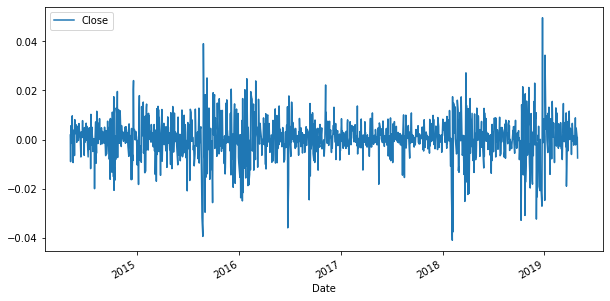

In [72]:
# Plot the S&P 500 daily returns and set the figure size
sp500_daily_returns.plot(figsize=(10, 5))

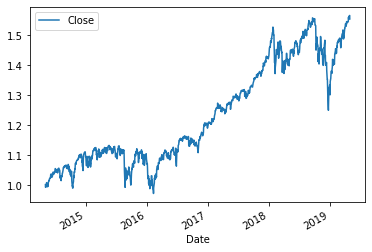

In [73]:
# Plot the S&P 500 cumulative returns
sp500_cumulative_returns.plot()

### <a id='Standard_Deviation'>Standard Deviation</a>

In [74]:
# Daily Standard Deviations
sp500_daily_std = sp500_daily_returns.std()
sp500_daily_std.head()

Close    0.008346
dtype: float64

In [75]:
# Calculate the annualized standard deviation (252 trading days)
sp500_annualized_std = sp500_daily_std * np.sqrt(252)
sp500_annualized_std.head()

Close    0.132483
dtype: float64

### <a id='Sharpe_Ratios'>Sharpe Ratios</a>

In [76]:
# Calculate the annualized sharpe ratio
sp500_sharpe_ratio = (
    sp500_daily_returns.mean() * 252 / (sp500_daily_returns.std() * np.sqrt(252))
)

sp500_sharpe_ratio

Close    0.733741
dtype: float64

### <a id='Rolling_Statistics'>Rolling Statistics</a>

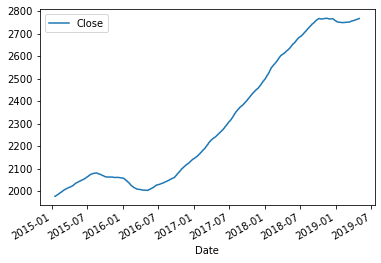

In [77]:
# Calculate the rolling 180-day rolling mean or moving average
sp500_df.rolling(window=180).mean().plot()

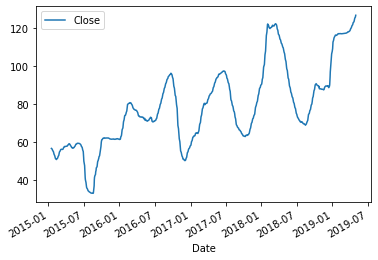

In [78]:
# Calculate the rolling 180-day rolling standard deviation
sp500_df.rolling(window=180).std().plot()

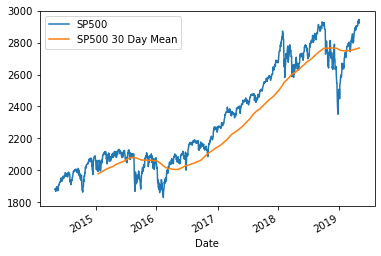

In [79]:
# Set figure of the daily closing prices of Tesla
ax = sp500_df.plot()

# Plot 180-Day Rolling Mean on the same figure
sp500_df.rolling(window=180).mean().plot(ax=ax)

# Set the legend of the figure
ax.legend(["SP500", "SP500 30 Day Mean"]);

### <a id='Correlation'>Correlation</a>

In [80]:
# Read in another CSV
amd_csv_path = Path("Resources/amd.csv") 
amd_df = pd.read_csv(
    amd_csv_path, index_col="Date", infer_datetime_format=True, parse_dates=True
)

# Use the `concat` function to combine the two DataFrames by matching indexes (or in this case `Month`)
combined_df = pd.concat([amd_df, sp500_df], axis="columns", join="inner")

# Rename columns
combined_df.columns = ['AMD', 'SP500']
combined_df.head()

,AMD,SP500
Date,,
2014-05-02,4.12,1881.140015
2014-05-05,4.09,1884.660034
2014-05-06,4.01,1867.719971
2014-05-07,3.97,1878.209961
2014-05-08,3.93,1875.630005


In [81]:
# Use the `corr` function to calculate correlations
correlation = combined_df.corr()

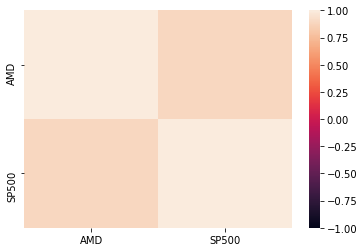

In [82]:
# Import the Seaborn library
import seaborn as sns

# Use the `heatmap` function from the Seaborn library to visualize correlations
sns.heatmap(correlation, vmin=-1, vmax=1)

### <a id='Beta'>Beta</a>

In [83]:
# Use the `pct_change` function to calculate daily returns of closing prices for each column
combined_daily_returns = combined_df.pct_change()
combined_daily_returns.head()

,AMD,SP500
Date,,
2014-05-02,NaN,NaN
2014-05-05,-0.007282,0.001871
2014-05-06,-0.019560,-0.008988
2014-05-07,-0.009975,0.005616
2014-05-08,-0.010076,-0.001374


In [84]:
# Calculate covariance of all daily returns of AMD vs. S&P 500
covariance = combined_daily_returns['AMD'].cov(combined_daily_returns['SP500'])
covariance

0.00011967502859726325

In [85]:
# Calculate variance of all daily returns of AMD vs. S&P 500
variance = combined_daily_returns['SP500'].var()
variance

6.965026462153664e-05

In [86]:
# Calculate beta of all daily returns of AMD
amd_beta = covariance / variance
amd_beta

1.7182279097940196

### <a id='Portfolio_Returns'>Portfolio Returns</a>

In [87]:
# Calculate Portfolio Returns with an equal amount of each stock
weights = [0.5, 0.5]

portfolio_returns = combined_daily_returns.dot(weights)
portfolio_returns.head()

Date
2014-05-02         NaN
2014-05-05   -0.002705
2014-05-06   -0.014274
2014-05-07   -0.002179
2014-05-08   -0.005725
dtype: float64

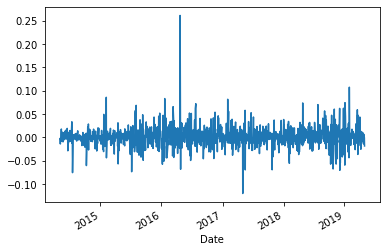

In [88]:
# Use the `plot` function to visualize daily portfolio returns
portfolio_returns.plot()

In [89]:
# Use the `cumprod` function to generate cumulative portfolio returns from daily portfolio returns
cumulative_portfolio_returns = (1 + portfolio_returns).cumprod() - 1
cumulative_portfolio_returns.head()

Date
2014-05-02         NaN
2014-05-05   -0.002705
2014-05-06   -0.016941
2014-05-07   -0.019083
2014-05-08   -0.024698
dtype: float64

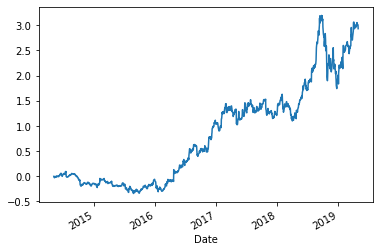

In [90]:
# Use the `plot` function to visualize daily portfolio returns
cumulative_portfolio_returns.plot()